### 基本信息爬取

首先我们编写代码用于爬取公司的基本信息，包括"股票简称"，"股票代码"，"公司的法定代表人"，"办公地址"，"公司国际互联网网址"，"电子信箱"和近三年归属于上市公司股东的扣除非经常性损益的净利润，并将最后结果以DataFrame的形式储存。具体代码如下：

In [60]:
#导入所有所需要用到的模块
import pdfplumber
import re
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
#设置一个函数pdf_info，用来爬取公司的基本信息
def pdf_info(pdf_name):

    TEXT = ""
    
    with pdfplumber.open(pdf_name) as pdf:

        for n in range(0,40): 
            page = pdf.pages[n]
            text = page.extract_text()
            if text != None:
                TEXT += text
            else:
                pass
    
    #将爬取的pdf文本进行一定的清理，同时定位所需要的部分
    TEXT_clear = TEXT.replace("\n","")
    TEXT_2 = re.findall("公司简介和主要财务指标(.*?)公司业务概要",TEXT_clear,re.S)[1]
    
    #为了减少代码冗余度，我们设置一个循环替代正则表达式的直接编写
    index_name = ["股票简称","股票代码","公司的法定代表人","办公地址","公司国际互联网网址","电子信箱"]
    index_name_cut = ["股票代码","公司的中文名称","注册地址","办公地址的邮政编码","电子信箱","二、联系人和联系方式"]
    values_1 = []
    str_re1 = ""
    t = 0

    while t < len(index_name):
        str_re1 = str(index_name[t]) + "(.*?)" + str(index_name_cut[t])
        value = re.findall(str_re1,TEXT_2,re.S)[0].replace("\n","").strip()
        values_1.append(value)
        t += 1
    
    #因为部分pdf中，"股票代码"之后不是"公司的中文名称"，所以此处用切片的方式进行一定的处理
    l1 = values_1[0:1] + [str(values_1[1])[0:7]] + values_1[2:]  
    str_re2_1 = re.findall("五、主要会计数据和财务指标(.*?)六、分季度主要财务指标",TEXT_2,re.S)[0]
    str_re2_2 = re.findall("归属于上市公司[\u4E00-\u9FA5]*股东的扣除(.*?)经营活动产生的现金流量",str_re2_1,re.S)[0]
    str_re2_3 = re.sub(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*%","",str_re2_2)  #除去2018年比2017年的增长率
    values_2 = re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*",str_re2_3)
    #此次设置一个判断语句，用于排除部分pdf中，包括了2018、2017年调整前后的数据
    if len(values_2) == 3:
        for each in values_2:
            l1.append(each)
    else:
        for each in values_2[::2]:
            l1.append(each)    
 
    
    return l1

In [18]:
#设置一个函数，将指定文件夹中所有文件写入列表12
def file_name(file):
    l2 = []
    for a,b,files in os.walk(file):
        for file in files:
            if os.path.splitext(file)[1] == ".pdf":
                l2.append(os.path.join(a,file))
    return l2

In [4]:
#输出情况如下
file_name("D:/360Safe/2019年高新技术企业")

['D:/360Safe/2019年高新技术企业\\300005：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300007：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300008：2019年年度报告(更新后).pdf',
 'D:/360Safe/2019年高新技术企业\\300009：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300011：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300012：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300014：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300016：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300017：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300018：2019年年度报告(更新后).pdf',
 'D:/360Safe/2019年高新技术企业\\300019：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300020：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300021：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300022：2019年年度报告(更新后).pdf',
 'D:/360Safe/2019年高新技术企业\\300023：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300024：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300025：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300030：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300031：2019年年度报告.pdf',
 'D:/360Safe/2019年高新技术企业\\300033：2019年年度报告.pdf',
 'D:/

In [4]:
#以l3作为行标题，将爬取的公司信息写入一个二维列表df,在此我们只爬取了前40家公司的数据
l3 =  ["股票简称","股票代码","法定代表人","办公地址","公司网址","电子信箱","2019年","2018年","2017年"]
l4 = []
for i in file_name("D:/360Safe/2019年高新技术企业")[0:40]:
    l4.append(pdf_info(i))  
df = pd.DataFrame(data=l4,columns = l3)

In [5]:
#输出结果如下：
df

股票简称     股票代码    法定代表人                              办公地址  \
0    探路者   300005       王静              北京市昌平区北七家镇宏福科技园 28 号   
1   汉威科技   300007      任红军                  郑州高新开发区雪松路 169 号   
2   天海防务   300008       刘楠                 上海市松江区莘砖公路518号10幢   
3   安科生物   300009      宋礼华              合肥市长江西路669号高新区海关路k-1   
4   鼎汉技术   300011      顾庆伟         北京市丰台区南四环西路188号十八区2号楼（园区）   
5   华测检测   300012       万峰            深圳市宝安区新安街道留仙三路4号华测检测大楼   
6   亿纬锂能   300014      刘金成                广东省惠州市仲恺高新区惠风七路38号   
7   北陆药业   300016  WANG XU        北京市海淀区西直门北大街32号枫蓝国际写字楼A座7层   
8   网宿科技   300017      刘成彦          上海市徐汇区斜土路2899号光启文化广场A幢5楼   
9   中元股份   300018      邓志刚       中国湖北武汉东湖新技术开发区华中科技大学科技园六路6号   
10  硅宝科技   300019      王有治                      成都高新区新园大道16号   
11  银江股份   300020       王腾                   浙江省杭州市西湖区西园八路2号   
12  大禹节水   300021      王浩宇                 天津市武清区京滨工业园民旺道10号   
13  吉峰科技   300022      王新明      成都市郫都区成都现代工业港北部园区港通北二路 219 号   
14  宝德股份   300023       赵敏            西安市高新区草堂科技产业基地秦岭大道西付6号   
15   机器人   300024      曲道奎                     沈阳市浑南新区全运路33号   
16  华星创业   300025      朱定楷                 杭州市滨江区长河街道聚才路500号   
17  阳普医疗   300030      邓冠华             广州市经济技术开发区科学城开源大道102号   
18  宝通科技   300031      包志方                   江苏省无锡市新吴区张公路19号   
19   同花顺   300033       易峥                  杭州市余杭区五常街道同顺街18号   
20  钢研高纳   300034       艾磊                    北京市海淀区大柳树南村19号   
21  中科电气   300035       余新             湖南省岳阳经济技术开发区岳阳大道中科工业园   
22   新宙邦   300037      覃九三                  深圳市坪山区昌业路新宙邦科技大厦   
23  数知科技   300038      张志勇             北京市海淀区花园东路15号旷怡大厦7-9层   
24  上海凯宝   300039      穆竟伟                  上海市工业综合开发区程普路88号   
25  九洲电气   300040       李寅                    哈尔滨市松北区九洲路609号   
26  回天新材   300041       章锋              湖北省襄阳市国家高新技术开发区航天路7号   
27  朗科科技   300042       魏卫  深圳市南山区高新区南区高新南六道10号朗科大厦16、18、19层   
28  星辉娱乐   300043      陈雁升         广东省广州市天河区黄埔大道西122号星辉中心26楼   
29  台基股份   300046       邢雁                  湖北省襄阳市襄城区胜利街162号   
30  天源迪科   300047       陈友        深圳市南山区粤海街道沙河西路1801号国实大厦10楼   
31  合康新能   300048      叶进吾                北京市北京经济技术开发区博兴二路3号   
32  世纪鼎利   300050       王耘                 珠海市港湾大道科技五路 8 号一层   
33   中青宝   300052      李瑞杰          深圳市南山区深圳湾科技生态园10A栋21-23层   
34   欧比特   300053      颜志宇                珠海市唐家东岸白沙路1号欧比特科技园   
35  鼎龙股份  300054       朱双全                  武汉市经济技术开发区东荆河路1号   
36   万邦达   300055      王长荣          北京市海淀区新街口外大街19号京师大厦9325室   
37  中创环保   300056      王光辉       厦门火炬高新区(翔安)产业区春光路1178-1188号   
38  万顺新材   300057      杜成城                     广东省汕头保税区万顺工业园   
39  东方财富   300059       其实               上海市徐汇区宛平南路88号东方财富大厦   

                                             公司网址                        电子信箱  \
0                               www.toread.com.cn      ir300005@toread.com.cn   
1                                   www.hanwei.cn           hwdz@hwsensor.com   
2                               www.bestwaysh.com        public@bestwaysh.com   
3                                 www.ankebio.com          master@ankebio.com   
4                     http：//www.dinghantech.com/          ir@dinghantech.com   
5                                www.cti-cert.com       security@cti-cert.com   
6                              www.evebattery.com           ir@evebattery.com   
7                                www.beilu.com.cn           blxp@beilu.com.cn   
8                           http://www.wangsu.com        wangsudmb@wangsu.com   
9                          http://www.zyhd.com.cn           stock@zyhd.com.cn   
10                                  www.guibao.cn            guibao@guibao.cn   
11                                www.enjoyor.net         enjoyor@enjoyor.net   
12                                   www.dyjs.com            dyjszqb@dyjs.com   
13                          http://www.gifore.com           office@gifore.com   
14                                 www.bode-e.com        dongmiban@bode-e.com   
15                          http://www.siasun.com              zqb@siasun.com   
16

### 多元线性回归

为了探究2019年归属于上市公司股东的扣除非经常性损益的净利润与哪些因素有关，我们将其作为因变量(y)，以(["2018年的盈亏情况","2018年比2017年的增长率(%)","2019年的资产负债比","2018年的资产负债比"])作为自变量，对其进行多元线性回归，其中，"2018年的盈亏情况"是一个虚拟变量，当2018年归属于上市公司股东的扣除非经常性损益的净利润（调整后）为正时，其值为1，否则为0。

In [55]:
#首先我们设置一个函数爬取所需要的数据，基本原理同上
def data_get(pdf_name):

    TEXT= ""
    
    with pdfplumber.open(pdf_name) as pdf:

        for n in range(0,len(pdf.pages)):
            page = pdf.pages[n]
            text = page.extract_text()
            if text != None:
                TEXT += text
            else:
                pass
    
    TEXT_clear = TEXT.replace("\n","")
    TEXT_1 = re.findall("公司简介和主要财务指标(.*?)公司业务概要",TEXT_clear,re.S)[1]
    TEXT_2 = re.findall("二、财务报表(.*?)公司基本情况",TEXT_clear,re.S)[0]

    #爬取2019、2018年的资产负债比
    str_1 = re.findall("资产总计(.*?)流动负债",TEXT_2,re.S)[0]
    data_pro_2019 = float(re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*",str_1)[0].replace(",",""))
    data_pro_2018 = float(re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*",str_1)[1].replace(",",""))
    str_2 = re.findall("负债合计(.*?)所有者权益",TEXT_2,re.S)[0]
    data_debt_2019 = float(re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*",str_2)[0].replace(",",""))
    data_debt_2018 = float(re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*",str_2)[1].replace(",",""))
    ratio_2019 = data_pro_2019/data_debt_2019
    ratio_2018 = data_pro_2019/data_debt_2018

    l1 = []
    str_re1_1 = re.findall("五、主要会计数据和财务指标(.*?)六、分季度主要财务指标",TEXT_1,re.S)[0]
    str_re1_2 = re.findall("归属于上市公司[\u4E00-\u9FA5]*股东的扣除(.*?)经营活动产生的现金流量",str_re1_1,re.S)[0]
    str_re1_3 = re.sub(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*%","",str_re1_2)
    values = re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*",str_re1_3)
    #设置虚拟变量
    if len(values) == 3:
        a = 1 if float(values[1].replace(",",""))>0 else 0 
        l1.append(a)
    else:
        a = 1 if float(values[2].replace(",",""))>0 else 0
        l1.append(a) 
    
    #value_1为"2018年比2017年的增长率(%)"，value_2为"2019年归属于上市公司股东的扣除非经常性损益的净利润"
    value_1 = float(re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*%",str_re1_2)[0].replace("%","").replace(",",""))
    l1.append(value_1)
    value_2 = float(re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*",str_re1_2)[0].replace(",",""))
    l1.append(value_2)
    l1.append(ratio_2019)
    l1.append(ratio_2018)
    
    return l1

In [56]:
#以l5作为行标题，将爬取的所需数据写入一个二维列表df_1,在此我们只爬取了前40家公司的数据
l5 =  ["2018年的盈亏情况","2018年比2017年的增长率(%)","2019年","2019年的资产负债比","2018年的资产负债比"]
l6 = []
for j in file_name("D:/360Safe/2019年高新技术企业")[0:40]:
    l6.append(data_get(j))  
df_1 = pd.DataFrame(data=l6,columns = l5)

In [57]:
#运行结果如下
df_1

2018年的盈亏情况  2018年比2017年的增长率(%)         2019年  2019年的资产负债比  2018年的资产负债比
0            0              108.90  1.894827e+07     6.375115     6.883622
1            1            -3044.51 -1.932141e+08     3.141668     2.951465
2            0               82.88 -3.302434e+08     1.260275     1.276820
3            1              -61.16  1.045361e+08     7.784575     7.429287
4            0              106.15  3.617494e+07     2.732152     2.940436
5            1              111.41  3.572361e+08     3.999924     3.734483
6            1              200.55  1.491258e+09     2.701220     3.893010
7            1               23.39  1.665492e+08    12.898748    26.130243
8            1             -184.71 -5.915236e+08     7.434803     3.990152
9            0              109.73  4.399629e+07     9.753791     8.375076
10           1              112.32  1.237839e+08     5.105526     5.063670
11           1                6.75  1.314594e+08     2.120474     2.263329
12           1               20.99  1.134470e+08     2.005922     1.998080
13           0            -1346.69 -1.055190e+08     1.213214     1.184345
14           0               38.12 -3.890011e+08     6.403204     0.135840
15           1              -63.00  1.336039e+08     3.647076     4.038472
16           0             -609.79 -2.276083e+08     1.465093     1.349908
17           0              101.67  2.461977e+06     2.625196     4.826004
18           1               11.75  2.981662e+08     3.527526     6.639357
19           1               41.92  8.358844e+08     4.212630     6.658444
20           1               54.79  1.433516e+08     3.527959     5.390734
21           1               57.03  1.446748e+08     4.222931     4.838092
22           1                3.27  3.059430e+08     4.013712     3.813799
23           1              -24.59  4.611061e+08     4.866962     6.503436
24           1                2.46  2.447196e+08    11.842578    12.087798
25           1                9.68  3.084569e+07     4.907603     4.766695
26           1               49.78  1.455294e+08     2.751018     4.279155
27           1               12.43  5.066005e+07    13.454612    25.743183
28           1               37.72  2.694189e+08     2.878748     3.374745
29           1             -557.01 -2.684450e+08     4.192592     5.306927
30           1              -49.24  9.592466e+07     2.368032     3.764282
31           0              110.20  2.431105e+07     3.301183     2.644785
32           1            -1058.27 -4.773188e+08     3.660848     4.193902
33           1              -93.22  1.898204e+06     2.608727     3.312001
34           1             -562.32 -2.741242e+08     5.106931     4.790430
35           1             -112.26 -3.460983e+07    18.657362    22.717009
36           0              183.50  7.305985e+07     8.709487     4.701916
37           0              100.82  3.616158e+06     2.532742     1.174297
38           1                3.00  1.005374e+08     2.294366     2.642959
39           1               88.43  1.784770e+09     1.570246     3.205519

用上述数据做多元线性回归,得到的结果如下：

In [58]:
X = df_1[["2018年的盈亏情况","2018年比2017年的增长率(%)","2019年的资产负债比","2018年的资产负债比"]]
Y = df_1["2019年"]
X = sm.add_constant(X)
res = sm.OLS(Y,X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  2019年   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     3.296
Date:                Fri, 08 Jan 2021   Prob (F-statistic):             0.0215
Time:                        13:14:39   Log-Likelihood:                -845.71
No. Observations:                  40   AIC:                             1701.
Df Residuals:                      35   BIC:                             1710.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.22e+08   1.49e+08      0.821      0.417    -1.8e+08    4.24e+08
2018年的盈亏情况          2.605e+08   1.49e+08      1.748      0.089    -4.2e+07    5.63e+08
2018年比2017年的增长率(%)  2.786e+05   1.13e+05      2.475      0.018    5.01e+04    5.07e+05
2019年的资产负债比        -6.257e+07   3.36e+07     -1.863      0.071   -1.31e+08    5.62e+06
2018年的资产负债比         2.796e+07   2.21e+07      1.268      0.213   -1.68e+07    7.27e+07
==============================================================================
Omnibus:                       28.778   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.286
Skew:                           1.896   Prob(JB):                     1.34e-13
Kurtosis:                       7.603   Cond. No.                     1.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 结果分析

1. 修正Adj.R-squared从之前的27.4%下降到19.1%。说明2019年归属于上市公司股东的扣除非经常性损益的净利润指数变异性只有19.1%能被其与多个自变量之间的线性关系解释。
2. 回归系数coef：通过回归系数我们可以看出，只有2019年的资产负债比对应的回归系数为负，表示当其增加时，2019年的利润降低；其他自变量的回归系数为正，表示当其代表的自变量上升时，2019年的利润也是上升的。
3. 在选取的四个自变量中，只有2018年比2017年的增长率(%)的p值<0.05，说明选取的其他自变量同2019年归属于上市公司股东的扣除非经常性损益的净利润是没有显著关系的，故我们选取的自变量可能有误，不能很好地反映与因变量之间的关系。

### 偏回归图

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 30408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20111 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

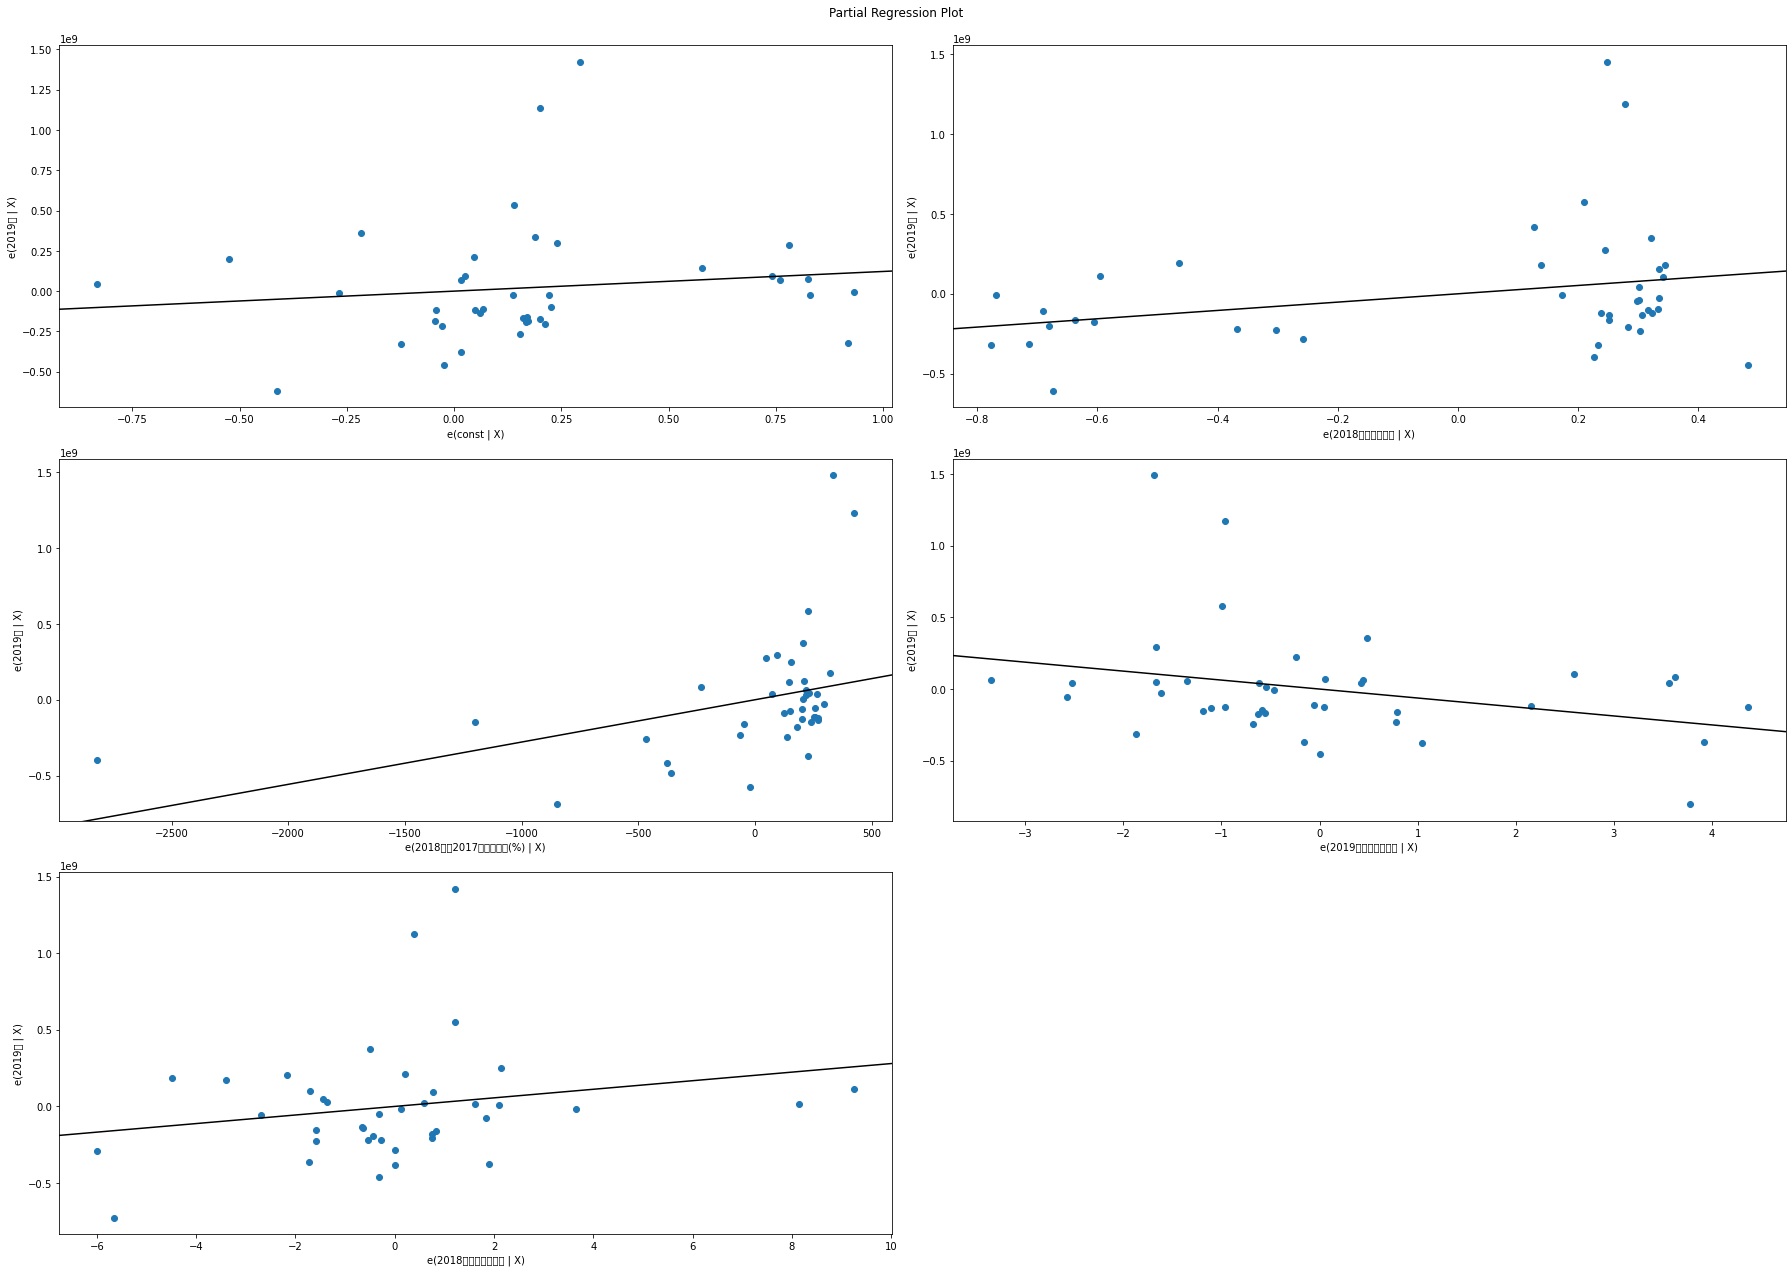

In [63]:
fig = plt.figure(figsize=(25,18))
fig = sm.graphics.plot_partregress_grid(res,fig=fig)

以上的偏回归图大致反映了每个自变量与因变量之间的趋势变化关系，根据图像也能很直观地说明，在选取的自变量中，只有2019年的资产负债与2019年利润成负相关，其他自变量的回归系数为正，与2019年的利润成正相关。

### 总结 

在本次实验中，我们根据爬取到的现有数据，对2019年归属于上市公司股东的扣除非经常性损益的净利润进行了多元线性回归分析，同时对模型描述信息进行分析，能简单评估线性回归模型的拟合质量。
作为利润回归分析所用的模型和方法，本实验存在很多的不足：
1. 爬取基本信息的代码仍没有很强的适用性，当公司财务报表的模板有大幅度变动时，将不能有效地提取所需要的数据。
2. 从多元线性回归的结果中可以看出，本实验选取的经济层面上的变量不能够很好地反映2019年利润的指数变动。因此还有很大的空间去完善模型，寻找比线性回归更合适的模型，或者考虑选择其他更合适的变量。
3. 本实验使用的数据集仅仅是容量很小的数据集，只选取了40家公司的相关信息，不具有代表性。